<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/UMMLP3/UM_MLIntern_P3(8Feb2026-1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###MOBILE PRICE PREDICTION

#### Importing the Lib's and Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the dataset
DfMPP=pd.read_csv('/content/sample_data/Mobile Price Pred.csv')
DfMPP

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
DfMPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
DfMPP.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
DfMPP.sample(1).T

,0
battery_power,842.0
blue,0.0
clock_speed,2.2
dual_sim,0.0
fc,1.0
four_g,0.0
int_memory,7.0
m_dep,0.6
mobile_wt,188.0
n_cores,2.0


In [ ]:
DfMPP['pc'].describe().T

,pc
count,2000.000000
mean,9.916500
std,6.064315
min,0.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,20.000000


In [ ]:
DfMPP.duplicated().sum()

np.int64(0)

In [ ]:
DfMPP.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


###Seperare the Features & Target

In [ ]:
X = DfMPP.drop("price_range", axis=1)

In [ ]:
y = DfMPP['price_range']

###Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

X_train_Scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
X_train_Scaled.shape

(1600, 20)

In [ ]:
X_test_scaled.shape

(400, 20)

###MODEL -1 :: LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(max_iter = 500,
                        multi_class = "multinomial")

LR.fit(X_train_Scaled, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [ ]:
yLR_pred = LR.predict(X_test_scaled)

###Checking the Metrics for TRAIN Dataset

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_prob1 = LR.predict_proba(X_train_Scaled)#[:,1]
#y_pred = LR.predict(X_test_scaled)
y_train_pred = LR.predict(X_train_Scaled)

print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall   :", recall_score(y_train, y_train_pred, average='weighted'))
print("F1 Score :", f1_score(y_train, y_train_pred, average='weighted'))
print("ROC AUC  :", roc_auc_score(y_train_pred, y_prob1, average='weighted', multi_class='ovr'))
print('----'*20)
print("\t\tCONFUSION MATRIX - TRAIN")
print('----'*20)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Accuracy : 0.976875
Precision: 0.9769172694622088
Recall   : 0.976875
F1 Score : 0.976791202687239
ROC AUC  : 1.0
--------------------------------------------------------------------------------
		CONFUSION MATRIX - TRAIN
--------------------------------------------------------------------------------
Confusion Matrix:
 [[398   2   0   0]
 [ 10 385   5   0]
 [  0   8 382  10]
 [  0   0   2 398]]


In [ ]:
from sklearn.metrics import classification_report

labels = ['Low', 'Medium', 'High', 'Very High']

print("\t\t CLASSIFICATION REPORT - TRAIN")
print('----'*20)
print(classification_report(
    y_train,
    y_train_pred,
    target_names=labels
))

		 CLASSIFICATION REPORT - TRAIN
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         Low       0.98      0.99      0.99       400
      Medium       0.97      0.96      0.97       400
        High       0.98      0.95      0.97       400
   Very High       0.98      0.99      0.99       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



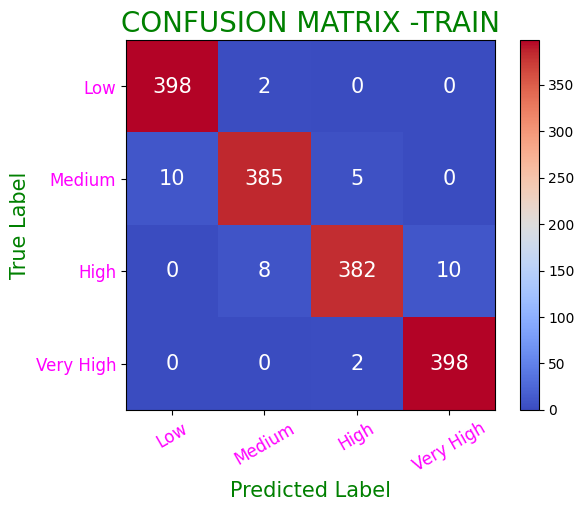

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = ['Low', 'Medium', 'High', 'Very High']

# Predict on TRAIN data
y_train_pred = LR.predict(X_train_Scaled)

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)

# Plot
disp = ConfusionMatrixDisplay(cm_train, display_labels=labels).plot(cmap='coolwarm')

for text in disp.text_.ravel():
    text.set_color("white")
    text.set_fontsize(15)

plt.xlabel("Predicted Label",size=15, color='Green')
plt.ylabel("True Label", size=15, color='Green')
plt.xticks(rotation=30, fontsize=12, color='magenta')
plt.yticks(rotation=0, fontsize=12, color='magenta')

plt.title("CONFUSION MATRIX -TRAIN", color= 'green', size=20)
plt.show()

###Checking the Metrics for TEST Dataset

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_prob = LR.predict_proba(X_test_scaled)#[:,1]
y_pred = LR.predict(X_test_scaled)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))
print("ROC AUC  :", roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr'))
print('----'*20)
print("\t\tCONFUSION MATRIX - TEST")
print('----'*20)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.965
Precision: 0.9650445632798573
Recall   : 0.965
F1 Score : 0.9649863177272501
ROC AUC  : 0.9986666666666667
--------------------------------------------------------------------------------
		CONFUSION MATRIX - TEST
--------------------------------------------------------------------------------
Confusion Matrix:
 [[98  2  0  0]
 [ 1 96  3  0]
 [ 0  2 94  4]
 [ 0  0  2 98]]


In [ ]:

from sklearn.metrics import classification_report

labels = ['Low', 'Medium', 'High', 'Very High']

print("\t\t CLASSIFICATION REPORT - TEST")
print('----'*20)
print(classification_report(
    y_test,
    y_pred,
    target_names=labels
))

		 CLASSIFICATION REPORT - TEST
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         Low       0.99      0.98      0.98       100
      Medium       0.96      0.96      0.96       100
        High       0.95      0.94      0.94       100
   Very High       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



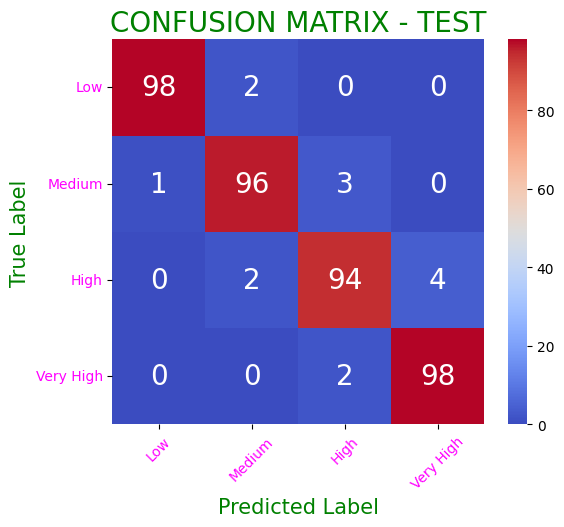

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ['Low', 'Medium', 'High', 'Very High']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, annot_kws={'fontsize':20}, fmt='d', cmap='coolwarm',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Label",size=15, color='Green')
plt.ylabel("True Label", size=15, color='Green')
plt.xticks(rotation=45, size=10, color='magenta')
plt.yticks(rotation=0, size=10, color='magenta')
plt.title("CONFUSION MATRIX - TEST", size=20, color='Green')

plt.show()

###Predicting Inference for a New Mobile

In [ ]:
New_Phone=[[1800, 1, 2.4, 1, 13, 1, 64, 0.5, 170, 8, 16, 1080, 1900, 3000, 15, 10, 14, 1, 1, 1]]
NP_Scaled=scaler.transform(New_Phone)
NMP = LR.predict(NP_Scaled)
print(NMP)

if NMP==0:
   print("Price is Low")
elif NMP==1:
   print("Price is Medium")
elif NMP==2:
   print("Price is High")
else:
   print("Price is Very High")

[3]
Price is Very High


In [ ]:
NM_Pred = LR.predict(New_Phone)
print(NM_Pred)

if NM_Pred==0:
   print("Price is Low")
elif NM_Pred==1:
   print("Price is Medium")
elif NM_Pred==2:
   print("Price is High")
else:
   print("Price is Very High")

[3]
Price is Very High


##EXPLORATORY DATA ANALYSIS

###Distribution of Price_Range categories

In [ ]:
DfMPP['price_range'].value_counts().sort_index()

,count
price_range,
0,500
1,500
2,500
3,500


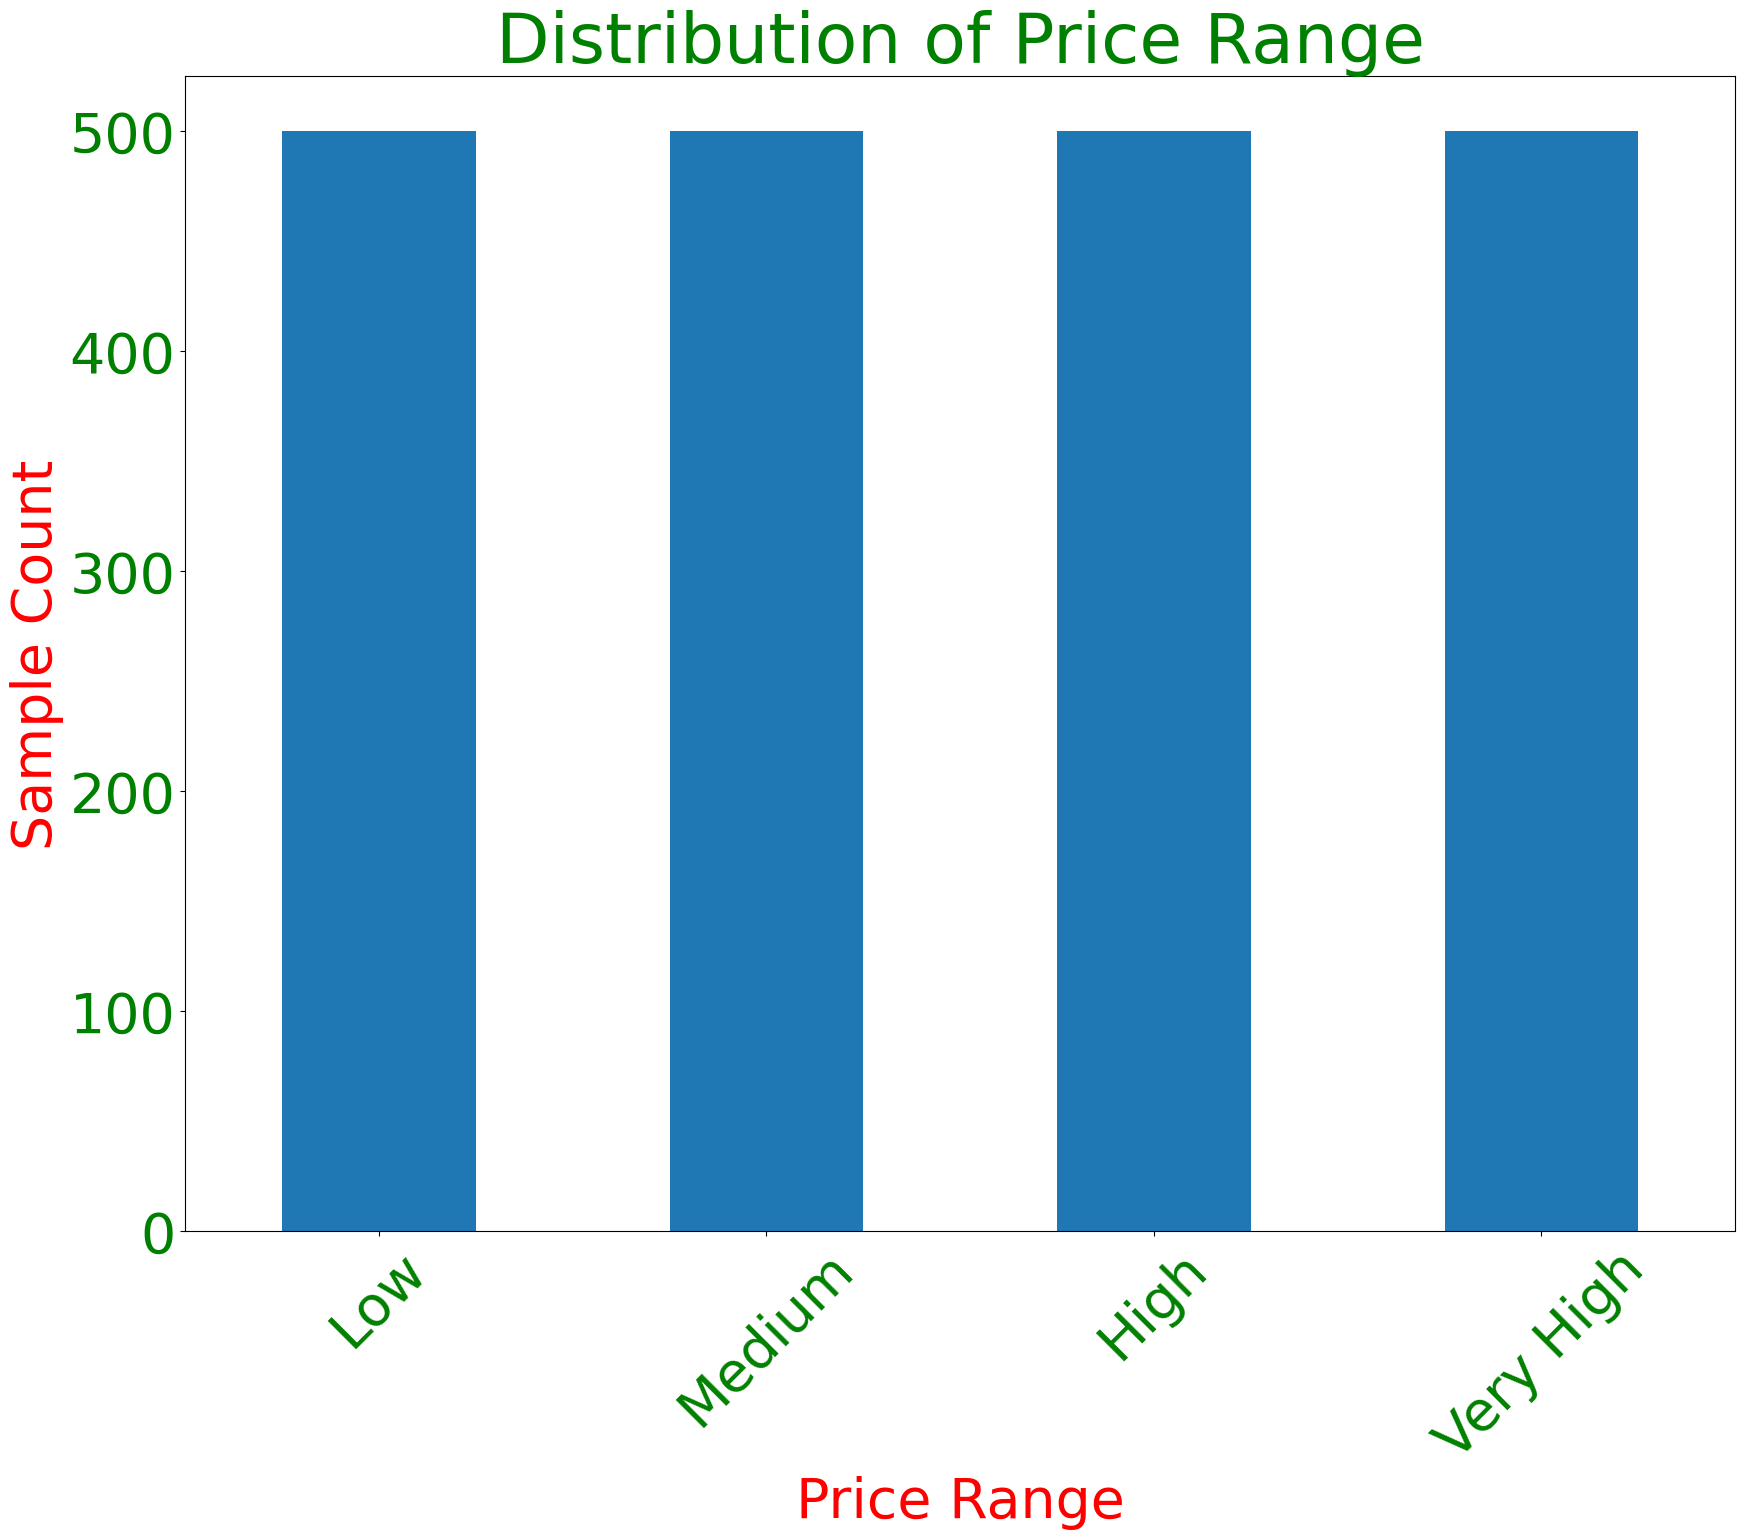

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
DfMPP['price_range'].value_counts().sort_index().plot(kind='bar')

plt.xlabel("Price Range", size=40, color='red')
plt.ylabel("Sample Count", size=40, color='red')
plt.title("Distribution of Price Range", size=50, color='green')
plt.xticks(rotation=45, size=40, color='green', ticks=[0,1,2,3], labels=['Low', 'Medium', 'High', 'Very High'])
plt.yticks(rotation=0, size=40, color='green')
plt.show()

###From above graph it can be understood that the Dataset has perfectly distributed samples for each category of price_range, which indicates balanced

###Feature Importance MODEL-1

In [ ]:

import pandas as pd
import numpy as np

feature_names = X_train.columns   # or list of feature names

coef = LR.coef_     # shape: (n_classes, n_features)

coef_df = pd.DataFrame(
    coef,
    columns=feature_names,
    index=['Low', 'Medium', 'High', 'Very High']  # your class labels
)

print(coef_df)

           battery_power      blue  clock_speed  dual_sim        fc    four_g  \
Low            -2.697611  0.097516     0.048368  0.109435 -0.006113 -0.075147   
Medium         -0.867891  0.015880    -0.076543  0.040693  0.021858  0.022800   
High            0.821211 -0.017077    -0.040873 -0.093733  0.032547 -0.078293   
Very High       2.744291 -0.096319     0.069048 -0.056395 -0.048292  0.130640   

           int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
Low         -0.201302 -0.012285   0.422961 -0.040699 -0.020106  -1.553335   
Medium      -0.051832  0.100864   0.189519 -0.102128 -0.081396  -0.476717   
High         0.003095 -0.083252  -0.008975  0.062905  0.000473   0.460244   
Very High    0.250039 -0.005327  -0.603506  0.079921  0.101030   1.569808   

           px_width        ram      sc_h      sc_w  talk_time   three_g  \
Low       -1.568898 -10.888021 -0.057052 -0.032184  -0.059847  0.026885   
Medium    -0.528789  -3.407842 -0.049364 -0.067813  -0.027

In [ ]:

importance = np.mean(np.abs(coef), axis=0)

imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(imp_df)

          Feature  Importance
13            ram    7.147931
0   battery_power    1.782751
12       px_width    1.048843
11      px_height    1.015026
8       mobile_wt    0.306240
6      int_memory    0.126567
19           wifi    0.124381
14           sc_h    0.100494
5          four_g    0.076720
3        dual_sim    0.075064
9         n_cores    0.071413
2     clock_speed    0.058708
1            blue    0.056698
18   touch_screen    0.052260
10             pc    0.050751
7           m_dep    0.050432
15           sc_w    0.049999
16      talk_time    0.043651
17        three_g    0.036100
4              fc    0.027202


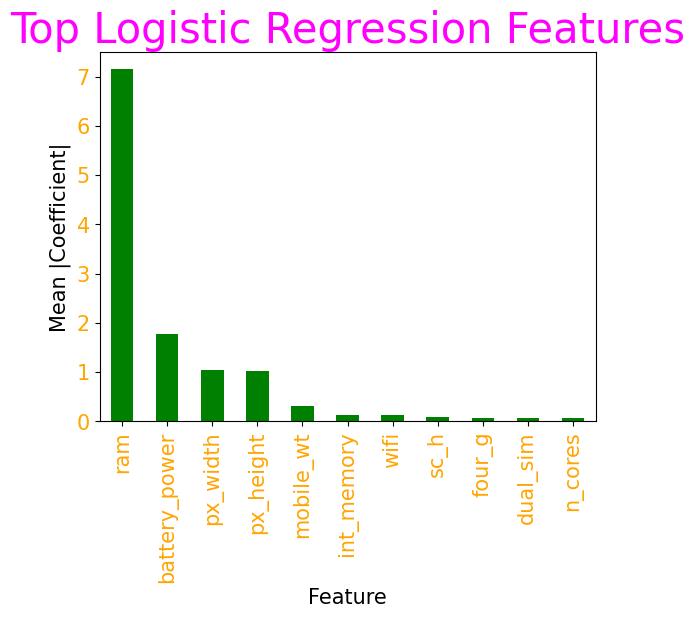

In [ ]:

import matplotlib.pyplot as plt

imp_df.head(11).plot(
    x='Feature',
    y='Importance',
    kind='bar',
    legend=False,
    #title="Top Logistic Regression Features",
    color= "green"
)

plt.title("Top Logistic Regression Features",
           color='magenta', size=30)
plt.yticks(color='orange', size=15)
plt.xticks(rotation=90, color='orange', size=15)
plt.xlabel('Feature', size=15)
plt.ylabel("Mean |Coefficient|", size=15)
plt.show()

###Multicollinearity MODEL-1

In [ ]:

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = your feature dataframe (only predictors, no target)
X = X_train.copy()   # or your full feature set

from statsmodels.tools.tools import add_constant
X_const = add_constant(X)
#print(X_const)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

#Removing Constant row
vif_data = vif_data[vif_data["Feature"] != "const"]
vif_data
print(vif_data.sort_values("VIF", ascending=False))

          Feature       VIF
11             pc  1.742631
5              fc  1.740449
6          four_g  1.520788
18        three_g  1.519760
15           sc_h  1.394170
16           sc_w  1.390891
12      px_height  1.352836
13       px_width  1.346538
17      talk_time  1.015235
10        n_cores  1.014344
4        dual_sim  1.012303
14            ram  1.011335
1   battery_power  1.011231
2            blue  1.010993
19   touch_screen  1.010818
7      int_memory  1.009827
8           m_dep  1.008900
3     clock_speed  1.008729
20           wifi  1.007793
9       mobile_wt  1.007071


####from above calculation the features are not Multicollinear which is

features have almost no multicollinearity.

###MODEL -2 :: RANDOM FOREST

In [ ]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:

df = pd.read_csv("mobile_price.csv")

X = df.drop("price_range", axis=1)
y = df["price_range"]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:

RFClass = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

RFClass.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
RFy_pred = RFClass.predict(X_test)

In [ ]:

print("Accuracy:", accuracy_score(y_test, RFy_pred))
print('----'*20)
print("\t (RF) CLASSIFICATION REPORT-TEST")
print("\nClassification Report:\n", classification_report(y_test, RFy_pred))
print('----'*20)
print("\t (RF) CONFUSION MATRIX-TEST")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, RFy_pred))
print('----'*20)

Accuracy: 0.8775
--------------------------------------------------------------------------------
	 (RF) CLASSIFICATION REPORT-TEST

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.81      0.84      0.82       100
           2       0.82      0.79      0.81       100
           3       0.94      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

--------------------------------------------------------------------------------
	 (RF) CONFUSION MATRIX-TEST

Confusion Matrix:
 [[95  5  0  0]
 [ 6 84 10  0]
 [ 0 15 79  6]
 [ 0  0  7 93]]
--------------------------------------------------------------------------------


In [98]:
RFytrain_pred = RFClass.predict(X_train)

In [103]:
print("Accuracy:", accuracy_score(y_train, RFytrain_pred))
print('----'*20)
print("\t (RF) CLASSIFICATION REPORT-TRAIN")
print('----'*20)
print("\nClassification Report:\n", classification_report(y_train, RFytrain_pred))
print('----'*20)
print("\t (RF) CONFUSION MATRIX-TRAIN")
print('----'*20)
print("\nConfusion Matrix:\n", confusion_matrix(y_train, RFytrain_pred))
print('----'*20)

Accuracy: 1.0
--------------------------------------------------------------------------------
	 (RF) CLASSIFICATION REPORT-TRAIN
--------------------------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

--------------------------------------------------------------------------------
	 (RF) CONFUSION MATRIX-TRAIN
--------------------------------------------------------------------------------

Confusion Matrix:
 [[400   0   0   0]
 [  0 400   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]
----------------------------------------

In [ ]:
importances = RFClass.feature_importances_

fi = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(fi)

          Feature  Importance
13            ram    0.482913
0   battery_power    0.072960
12       px_width    0.057762
11      px_height    0.055650
8       mobile_wt    0.038956
6      int_memory    0.035032
16      talk_time    0.030427
10             pc    0.029901
15           sc_w    0.028026
2     clock_speed    0.027638
14           sc_h    0.027481
4              fc    0.025799
7           m_dep    0.025140
9         n_cores    0.023310
5          four_g    0.007000
18   touch_screen    0.006984
1            blue    0.006976
3        dual_sim    0.006826
19           wifi    0.006460
17        three_g    0.004760


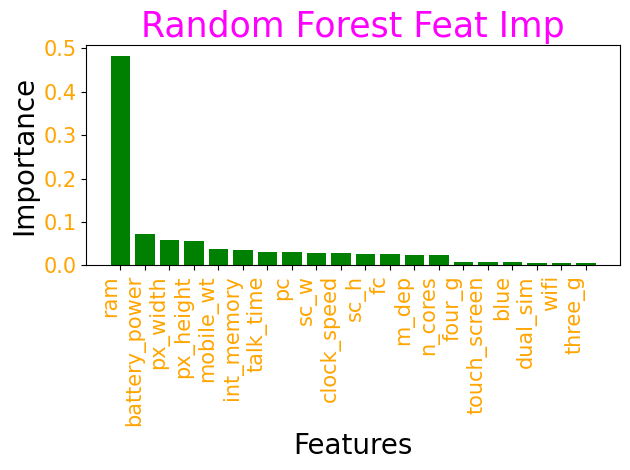

In [97]:

import matplotlib.pyplot as plt

plt.bar(fi["Feature"], fi["Importance"], color='green')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Features", size=20)
plt.xticks(rotation=90, size=15, color='orange')
plt.ylabel("Importance", size=20)
plt.yticks(rotation=0, size=15, color='orange')
plt.title("Random Forest Feat Imp", color='magenta', size=25)
plt.tight_layout()
plt.show()

In [93]:
New_Phone=[[1800, 1, 2.4, 1, 13, 1, 64, 0.5, 170, 8, 16, 1080, 1900, 3000, 15, 10, 14, 1, 1, 1]]
#NP_Scaled=scaler.transform(New_Phone)
NMRFP = LR.predict(NP_Scaled)
print(NMRFP)

if NMRFP==0:
   print("Price is Low")
elif NMRFP==1:
   print("Price is Medium")
elif NMRFP==2:
   print("Price is High")
else:
   print("Price is Very High")

[3]
Price is Very High


###1. Correlation & Heatmap

###2 Normality

###3.Univariate & Bivariate Analysis
like pairplot, hist, box, scatter plot,

###4.IQR

##FEATURE ENGG

###Feature Extraction, Selection Transformation & Scaling